<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/AIModule4Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Inteligence**
#**Module 4: Introduction to Fully Connected Neural Network - Assignment**

## **Problem Statement:**

Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can
accurately classify these images into the correct fashion categories.

## **Objectives:**

**Data Visualization and Preprocessing:**

● Visualize the distribution of different fashion items in the dataset to
understand the data better.

● Normalize the image pixel values for effective model training.

● Convert the categorical labels into a one-hot encoded format to suit the
neural network’s output layer.

**Model Architecture and Development:**

● Design a fully connected neural network with appropriate input, hidden,
and output layers.

● Ensure the model is complex enough to capture the underlying patterns in
the data without overfitting.

**Model Training:**

● Train the model on the preprocessed training data, using categorical
cross-entropy as the loss function, stochastic gradient descent as the
optimizer, and accuracy as the evaluation metric.

● Utilize a validation split to monitor the model’s performance on unseen
data during training.

**Performance Evaluation:**

● Assess the model’s performance using both training and validation
datasets.

● Visualize the training and validation loss and accuracy to identify any signs
of overfitting or underfitting.


### **Step 1: Loading the Libraries**

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### **Step 2: Data Visualization and Preprocessing**

In [10]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [11]:
# Normalize the pixel values for effective model training
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
# Convert the categorical labels into a one-hot encoded format to suit the neural network’s output layer
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
# Visualizing some images with labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

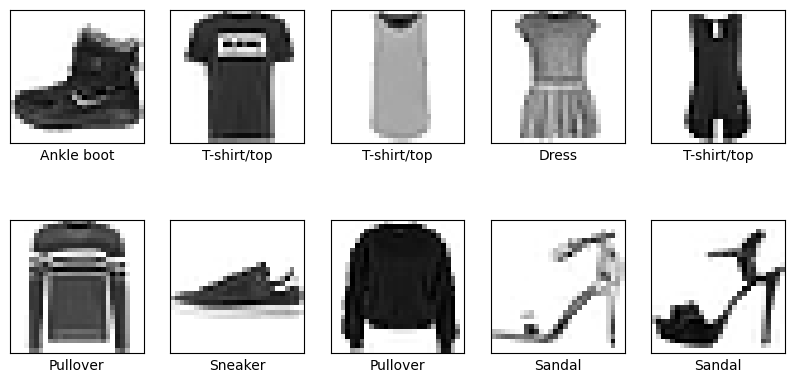

In [14]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

### **Step 3: Model Architecture and Development**

In [15]:
# Model Architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flattening the image
    keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),   # Hidden layer 2
    keras.layers.Dense(10, activation='softmax') # Output layer
])

In [17]:
# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Step 4: Model Training**

In [18]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6451 - loss: 1.1148 - val_accuracy: 0.8162 - val_loss: 0.5433
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8182 - loss: 0.5317 - val_accuracy: 0.8236 - val_loss: 0.5020
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8392 - loss: 0.4710 - val_accuracy: 0.8377 - val_loss: 0.4629
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8449 - loss: 0.4446 - val_accuracy: 0.8392 - val_loss: 0.4483
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8532 - loss: 0.4203 - val_accuracy: 0.8380 - val_loss: 0.4502
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8612 - loss: 0.3960 - val_accuracy: 0.8520 - val_loss: 0.4107
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8639 - loss: 0.3818 - val_accuracy: 0.8613 - val_loss: 0.3915
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8698 - loss: 0.3719 -

Text(0.5, 1.0, 'Loss Curve')

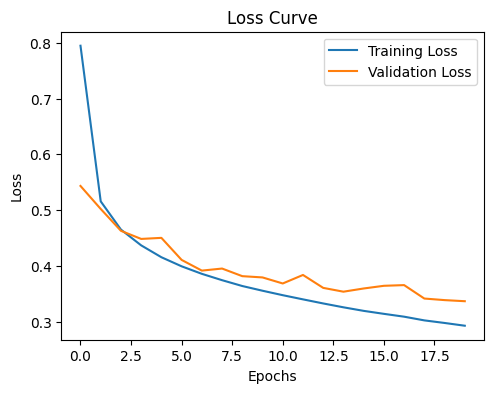

In [19]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')

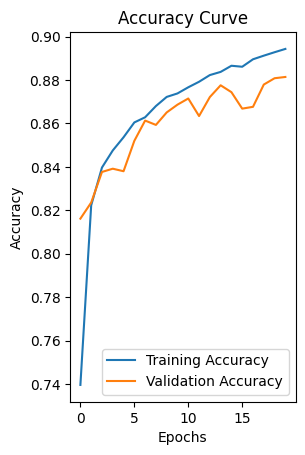

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()

### **Step 5: Performance Evaluation**

In [24]:
# Identify overfitting or underfitting
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Possible overfitting detected: Training accuracy is significantly higher than validation accuracy.")
elif history.history['accuracy'][-1] < history.history['val_accuracy'][-1]:
    print("Possible underfitting detected: Validation accuracy is higher than training accuracy.")
else:
    print("Model seems well-fitted.")

Possible overfitting detected: Training accuracy is significantly higher than validation accuracy.


In [21]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3565
Test Accuracy: 0.8708


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


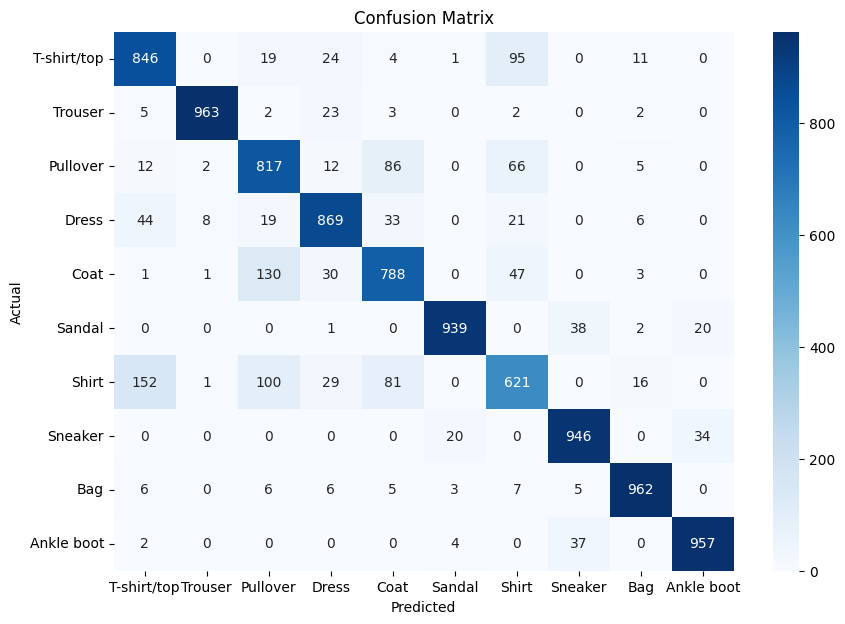

In [22]:
# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.85      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.75      0.82      0.78      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.79      0.79      0.79      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.72      0.62      0.67      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

